In [1]:
import heapq
import math
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import cKDTree

import Reeds_shepp_path as rs
import heapq
import math
import Environment as Env
import Vehicle
import cv2
DISCRETE_COST = 1
plot_array = []
discrete_motion =   [[1, 0, DISCRETE_COST],
                    [0, 1, DISCRETE_COST],
                    [-1, 0, DISCRETE_COST],
                    [0, -1, DISCRETE_COST],
                    [-1, -1, DISCRETE_COST * math.sqrt(2)],
                    [-1, 1, DISCRETE_COST * math.sqrt(2)],
                    [1, -1, DISCRETE_COST * math.sqrt(2)],
                    [1, 1, DISCRETE_COST * math.sqrt(2)]]


class D_Node:
    def __init__(self, x, y, cost):
        self.x = x
        self.y = y
        self.cost = cost


def create_heuristic_dict(goal_x, goal_y, obstacle_list):
    goal_node = D_Node(round(goal_x), round(goal_y), 0.0)
    
    obstacle_map = create_obstacle_map(obstacle_list)
    
    open_set, heurisitc_dict = dict(), dict()
    
    goal_ind = calc_index(goal_node)
    open_set[goal_ind] = goal_node
    
    ## cost, ind
    priority_q = [(0, goal_ind)]

    while True:
        if not priority_q:
            break
        
        cost, current_ind = heapq.heappop(priority_q)
        
        if current_ind in open_set:
            current_node = open_set[current_ind]
            heurisitc_dict[current_ind] = current_node
            open_set.pop(current_ind)
            
        else:
            continue
        
        for i, _ in enumerate(discrete_motion):
            new_node = D_Node(current_node.x + discrete_motion[i][0], current_node.y + discrete_motion[i][1], current_node.cost + discrete_motion[i][2])
            new_ind = calc_index(new_node)
            
            if new_ind in heurisitc_dict:
                continue
            
            if not check_discrete_collision(new_node, obstacle_map):
                continue
            
            if new_ind not in open_set:
                open_set[new_ind] = new_node
                heapq.heappush(priority_q, (new_node.cost, calc_index(new_node)))
                
            else:
                if open_set[new_ind].cost >= new_node.cost:
                    open_set[new_ind] = new_node
                    heapq.heappush(priority_q, (new_node.cost, calc_index(new_node)))
        
    return heurisitc_dict

def create_obstacle_map(obstacle_list):
    obstacle_map = [[False for _ in range(Env.YWID+1)] for _ in range(Env.XWID+1)]
    for i in range(Env.XWID+1):
        x = i + Env.XMIN
        for j in range(Env.YWID+1):
            y = j + Env.XMIN
            for ox, oy in obstacle_list:
                if [x, y] == [round(ox), round(oy)]:
                    obstacle_map[i][j] = True
                    plot_array.append([i, j])
                    break
    return obstacle_map

def calc_index(node):
    return (node.y - Env.YMIN) * Env.XWID + (node.x - Env.XMIN)

def check_discrete_collision(node, obstacle_map):
    if node.x < Env.XMIN:
            return False
    elif node.y < Env.YMIN:
        return False
    elif node.x >= Env.XMAX:
        return False
    elif node.y >= Env.YMAX:
        return False

    if obstacle_map[node.x][node.y]:
        return False
    
    return True

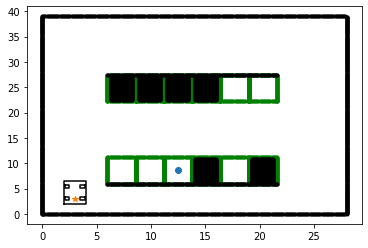

start :  [3, 3, 1.5707963267948966]
target :  [12.5, 8.6, -1.5707963267948966]


In [2]:
import numpy as np
import math
import Vehicle
import Environment as Env
import matplotlib.pyplot as plt
import random

CAR_INIT_X = 3
CAR_INIT_Y = 3
CAR_INIT_YAW = 90 #deg

env = Env.Environment_1(Env.XMIN,Env.YMIN,Env.XMAX,Env.YMAX)
env.create_world_1()
env.plot_world()
veh = Vehicle.Vehicle(x = CAR_INIT_X, y = CAR_INIT_Y, yaw = np.deg2rad(90), v=0.0)
veh.plot_car(0)
plt.show()

obs_list = env.obstacle_list

start_pos = [veh.x, veh.y, veh.yaw]
target_pos = [env.target_x, env.target_y, np.deg2rad(-90.0)]

print("start : ", start_pos)
print("target : ", target_pos)

obs_map = np.array(create_obstacle_map(obs_list))


In [4]:
heuristic_dict = create_heuristic_dict(target_pos[0], target_pos[1], obs_list)

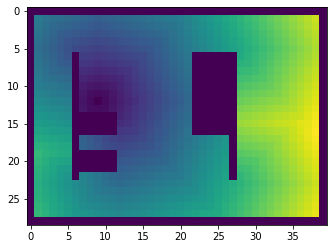

In [21]:
heuristic_map = np.zeros((Env.XWID+1, Env.YWID+1, 1))

for ind, node in heuristic_dict.items():
    heuristic_map[node.x][node.y] = node.cost
    
plt.imshow(heuristic_map)

In [ ]:

env.plot_world()
veh.plot_car(0)
plt.plot(np.array(plot_array)[:,0], np.array(plot_array)[:,1], '.r')
plt.show()


In [17]:
a = D_Node(0.3, 0.4, 1)
b = D_Node(0.4, 0.2, 3)
a_list = []

a_list.append(a)
a_list.append(b)
a_list.index(b)

1

In [9]:
a_list[0][0][0] = a

In [10]:
a_list[0][0][0]

In [13]:
array = [[[D_Node(0,0,0) for col in range(10)] for row in range(8)] for wid in range(50)]

In [14]:
len(array)

50